# Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('/Users/kartheekseemala/Downloads/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
col_names = ['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Label']
pima= pd.read_csv('/Users/kartheekseemala/Downloads/diabetes.csv',header=None,names=col_names)
pima.drop(pima.index[:1],inplace=True)
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [33]:
feature_cols = ['Pregnant','Insulin','BMI','Age','Glucose','BP','Pedigree']
X = pima[feature_cols]
y = pima.Label #Target Variable
y.shape
X.shape

(768, 7)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [36]:
clf = DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix 

array([[116,  30],
       [ 44,  41]])

In [38]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred,pos_label='1'))
print('Recall:',metrics.recall_score(y_test,y_pred,pos_label='1'))

Accuracy: 0.6796536796536796
Precision: 0.5774647887323944
Recall: 0.4823529411764706


In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

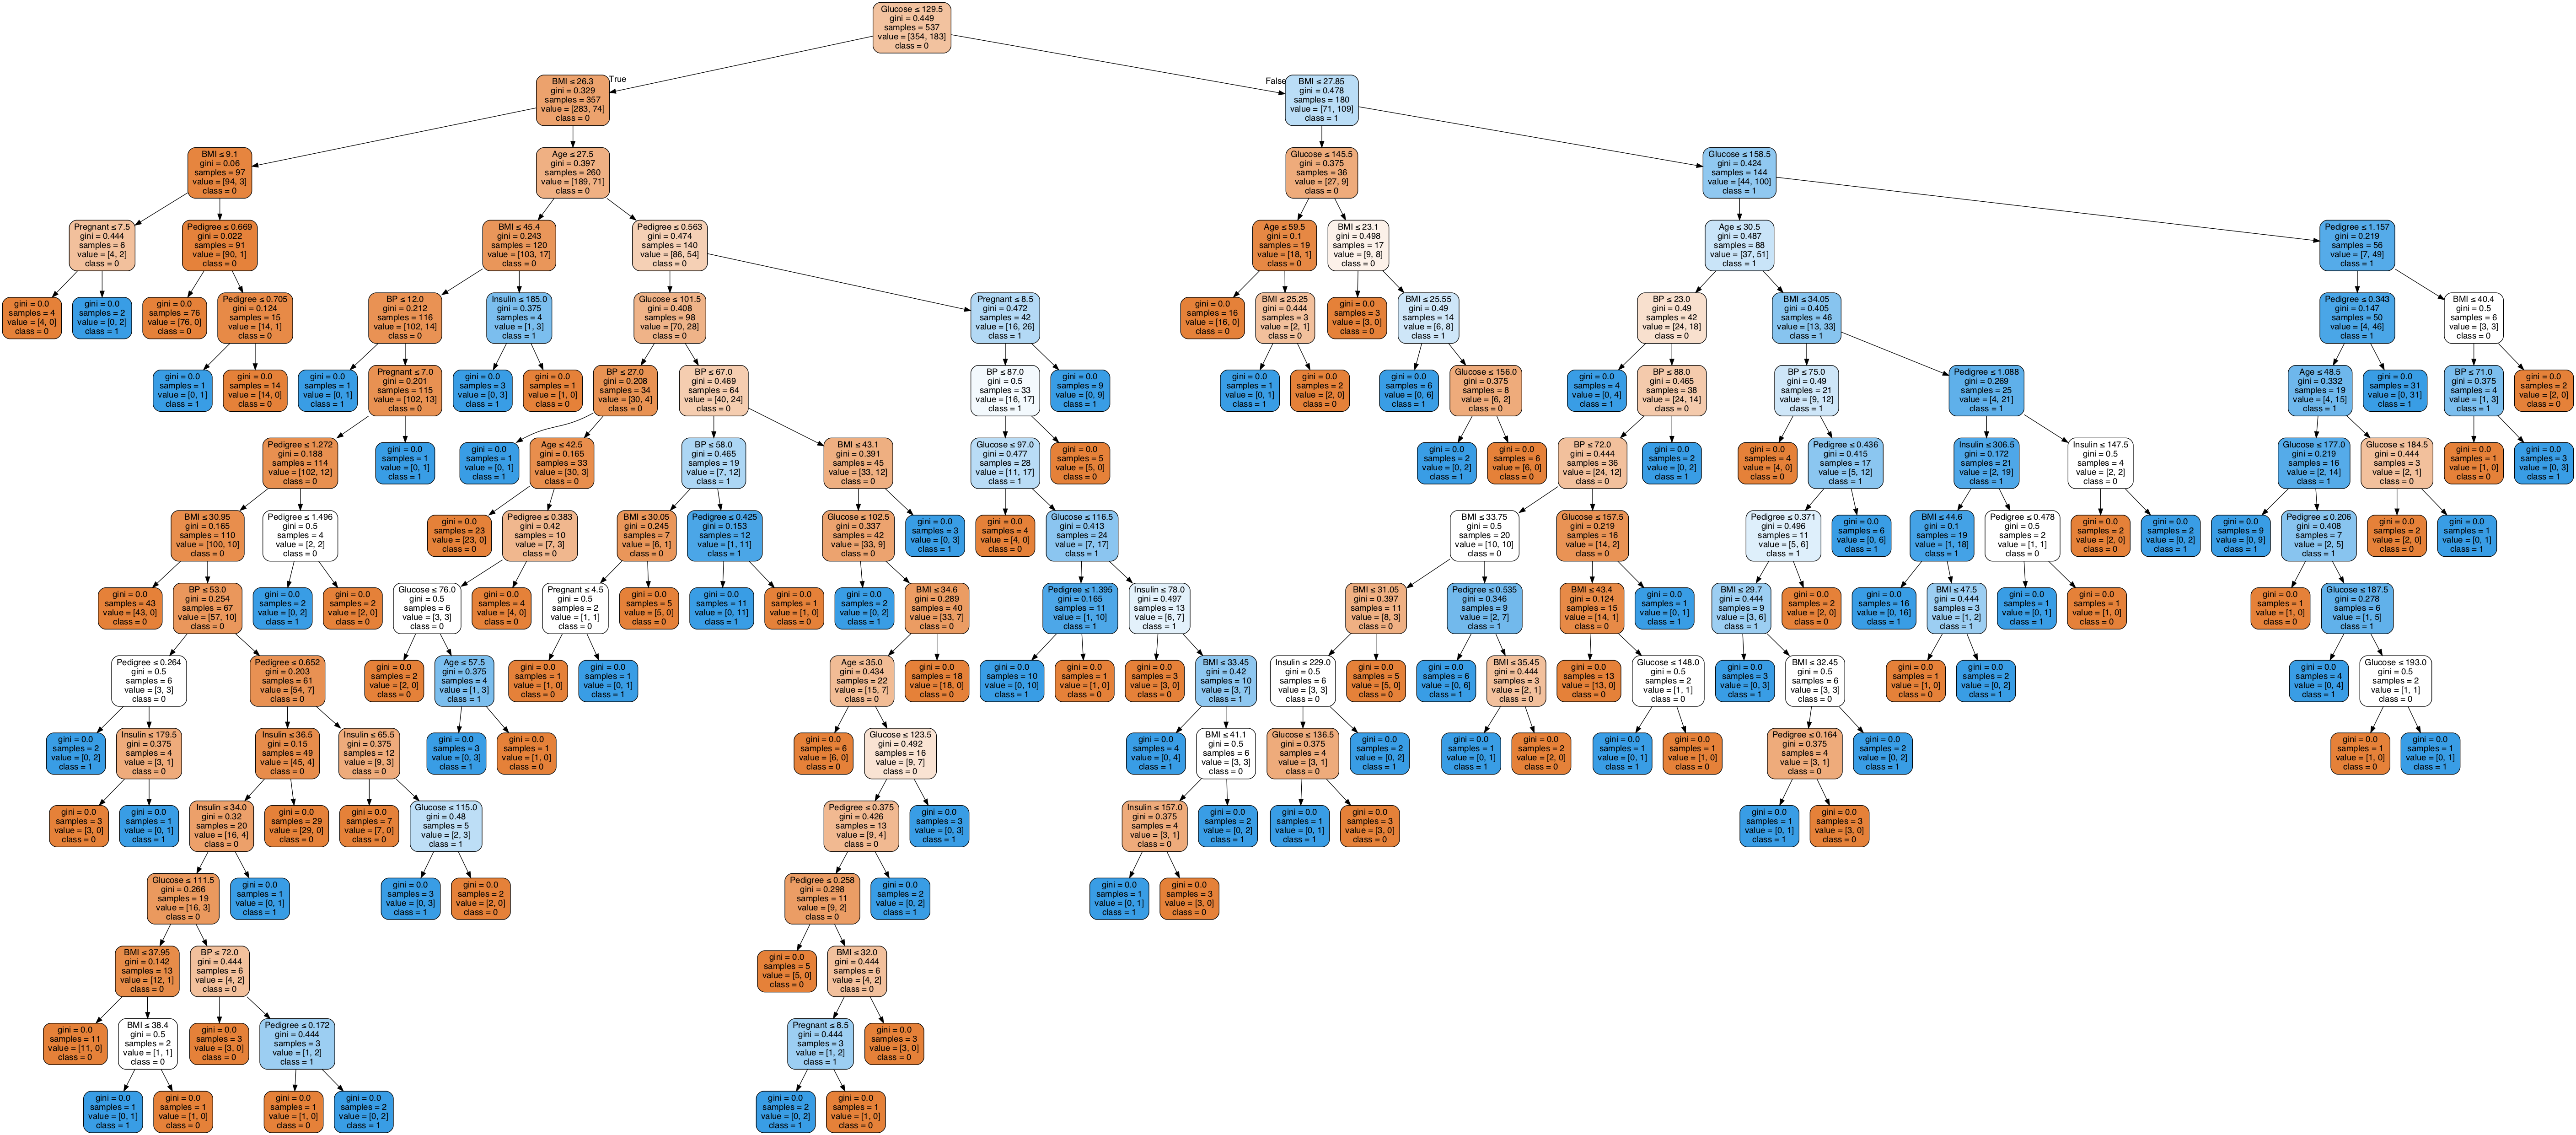

In [40]:
dot_data =StringIO()
export_graphviz(clf,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [41]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred,pos_label='1'))
print('Recall:',metrics.recall_score(y_test,y_pred,pos_label='1'))

Accuracy: 0.7705627705627706
Precision: 0.7105263157894737
Recall: 0.6352941176470588


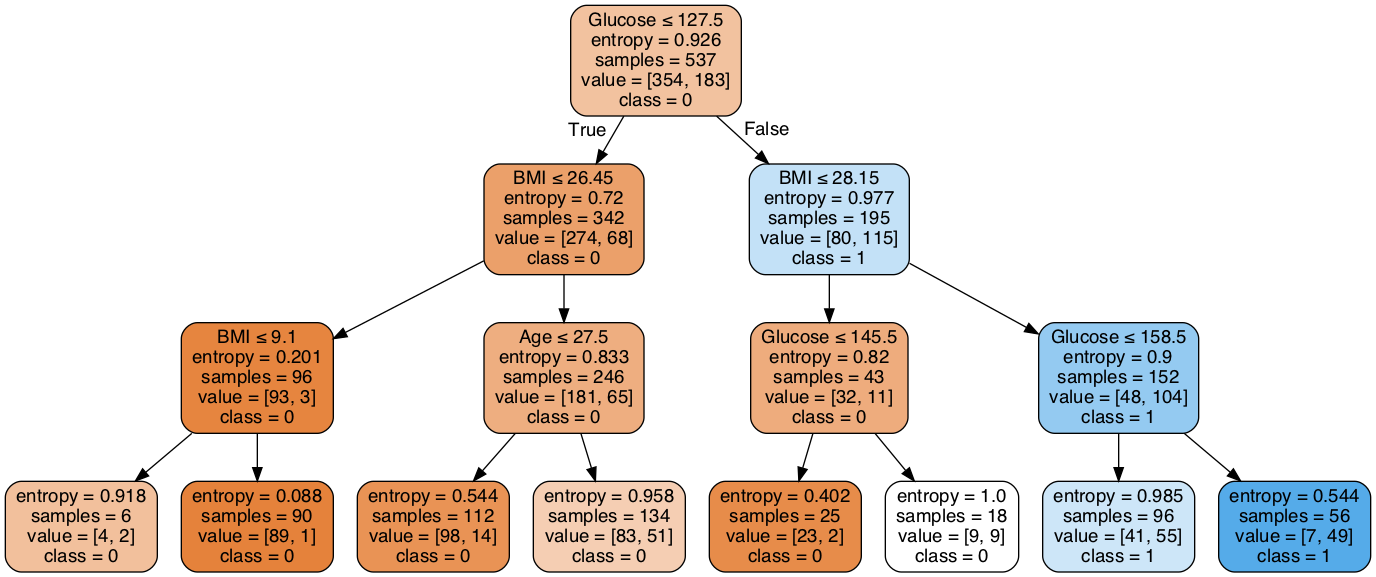

In [42]:
dot_data =StringIO()
export_graphviz(clf,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())